## Income risk estimates allowing for infrequent transitory shocks

### The basic facts about monthly wage growth 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
plt.style.use('seaborn-whitegrid')
colors = [x['color'] for x in plt.style.library['seaborn']['axes.prop_cycle']]

In [5]:
## configurations of plots
lw = 3
fontsize = 12

In [6]:
## SIPP data 
SIPP = pd.read_stata('../../../SIPP/sipp_nwage_growth_matrix.dta',
                    convert_categoricals=False)   
SIPP.index = SIPP['uniqueid']
SIPP = SIPP.drop(['uniqueid'], axis=1)
SIPP = SIPP.dropna(axis=0,how='all')

In [7]:
def cdf_func(data):
    """
    input
    =====
    a numpy array of monthly wage growth of all individuals 

    output
    =====
    data_sorted, values of growth rate 
    p: cdf by a particular value of growth 
    """
    data_sorted = np.sort(data)
    # calculate the proportional values of samples
    p = 1. * np.arange(len(data)) / (len(data) - 1)
    return data_sorted,p

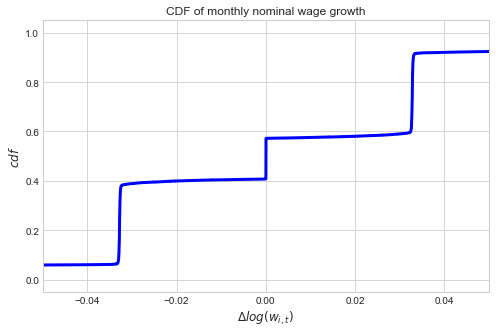

In [8]:
## for the whole sample 
group_by = ['educ','gender','age_5yr']
all_drop = group_by

## full sample 
sample_full =  SIPP.drop(all_drop,axis=1)
## income growth 
lw_gr = np.array(sample_full).flatten()
lw_gr = lw_gr[~np.isnan(lw_gr)]
## get the cdf funcs 
x_sorted,cdfs = cdf_func(lw_gr)

# plot the data for the whole sample
fig = plt.figure(figsize=(8,5))
#plt = fig.add_subplot(111)
plt.plot(x_sorted,
         cdfs,
         'b-',
        lw=lw)
plt.title('CDF of monthly nominal wage growth')
plt.xlabel(r'$\Delta log(w_{i,t})$',fontsize=fontsize)
plt.ylabel('$cdf$',fontsize=fontsize)
plt.xlim(-0.05,0.05)
plt.savefig('../Graphs/sipp/high_freq_cdf_all.png')

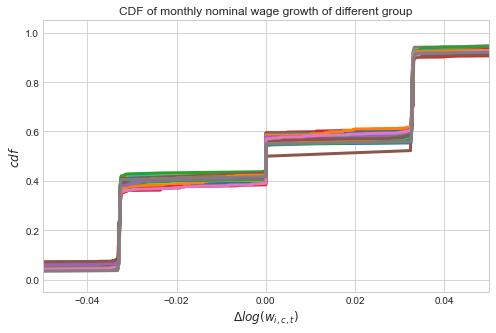

In [10]:
## different samples 

education_groups = [1, #'HS dropout',
                   2, # 'HS graduate',
                   3] #'college graduates/above'
gender_groups = [1, #'male',
                2] #'female'

#byear_groups = list(np.array(SIPP.byear_5yr.unique(),dtype='int32'))

age_groups = list(np.array(SIPP.age_5yr.unique(),dtype='int32'))

group_by = ['educ','gender','age_5yr']
all_drop = group_by #+['age_h','byear_5yr']


## sub sample 
sub_samples = []
para_est_list = []
sub_group_names = []

for edu in education_groups:
    for gender in gender_groups:
        for age5 in age_groups:
            belong = (SIPP['educ']==edu) & (SIPP['gender']==gender) & (SIPP['age_5yr']==age5)
            obs = np.sum(belong)
            #print(obs)
            if obs > 1:
                sample = SIPP.loc[belong].drop(all_drop,axis=1)
                sub_samples.append(sample)
                sub_group_names.append((edu,gender,age5))
                
                
fig = plt.figure(figsize=(8,5))
for i,sample in enumerate(sub_samples):
    ## estimation
    ## income growth 
    lw_gr = np.array(sample).flatten()
    lw_gr = lw_gr[~np.isnan(lw_gr)]
    ## get the cdf funcs 
    x_sorted,cdfs = cdf_func(lw_gr)

    # plot the data for the whole sample
    plt.plot(x_sorted,
             cdfs,
             lw=lw,
             label=sub_group_names[i])
    #ax1.set_title('monthly real wage growth rates')
plt.xlabel(r'$\Delta log(w_{i,c,t})$',fontsize=fontsize)
plt.ylabel('$cdf$',fontsize=fontsize)
plt.xlim(-0.05,0.05)
plt.title('CDF of monthly nominal wage growth of different group')
#plt.legend(loc=1)
plt.savefig('../Graphs/sipp/high_freq_cdf_by_group.png')